In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [6]:
df = pd.read_csv('../data/ncr_ride_bookings.csv')
print(df.shape)

(150000, 21)


In [7]:
display(df.head())

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [9]:
display(df.describe())

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [10]:
print(df.isnull().sum())

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64


In [11]:
print(df.duplicated().sum())

0


In [12]:
# Converter colunas de data e hora para o formato datetime
df['BookingTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [13]:
df['BookingTime']

0        2024-03-23 12:29:38
1        2024-11-29 18:01:39
2        2024-08-23 08:56:10
3        2024-10-21 17:17:25
4        2024-09-16 22:08:00
                 ...        
149995   2024-11-11 19:34:01
149996   2024-11-24 15:55:09
149997   2024-09-18 10:55:15
149998   2024-10-05 07:53:34
149999   2024-03-10 15:38:03
Name: BookingTime, Length: 150000, dtype: datetime64[ns]

In [14]:
# Extrair informações úteis da data e hora
df['Hour'] = df['BookingTime'].dt.hour
df['DayOfWeek'] = df['BookingTime'].dt.day_name()
df['Month'] = df['BookingTime'].dt.month_name()

In [16]:
display(df[['BookingTime', 'Hour', 'DayOfWeek', 'Month']].head())

,BookingTime,Hour,DayOfWeek,Month
0,2024-03-23 12:29:38,12,Saturday,March
1,2024-11-29 18:01:39,18,Friday,November
2,2024-08-23 08:56:10,8,Friday,August
3,2024-10-21 17:17:25,17,Monday,October
4,2024-09-16 22:08:00,22,Monday,September


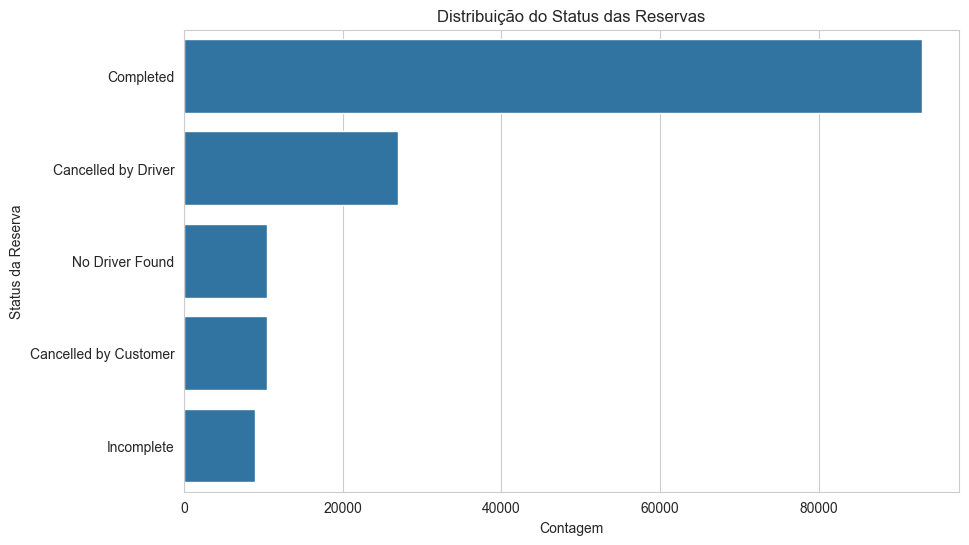

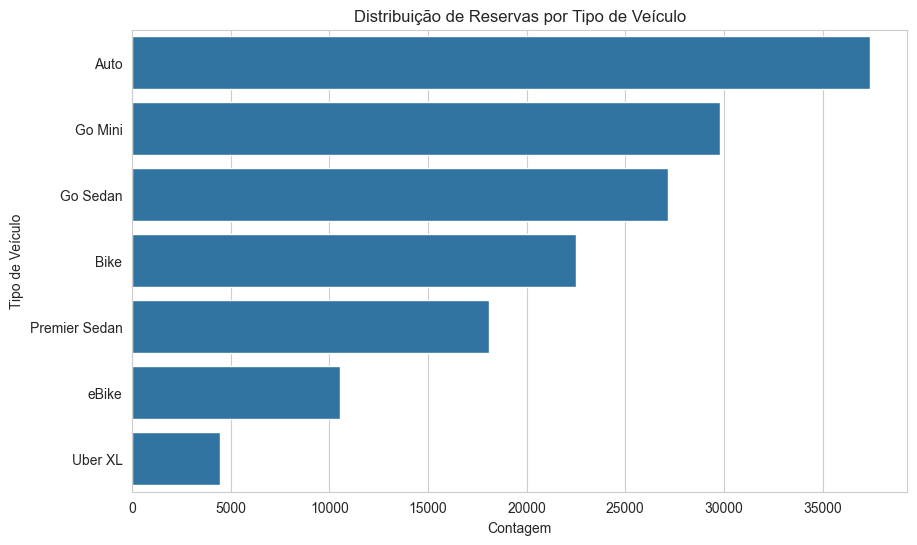

In [17]:
# 1. Distribuição do Status da Reserva
plt.figure(figsize=(10, 6))
sns.countplot(y='Booking Status', data=df, order=df['Booking Status'].value_counts().index)
plt.title('Distribuição do Status das Reservas')
plt.xlabel('Contagem')
plt.ylabel('Status da Reserva')
plt.show()

# 2. Distribuição dos Tipos de Veículo
plt.figure(figsize=(10, 6))
sns.countplot(y='Vehicle Type', data=df, order=df['Vehicle Type'].value_counts().index)
plt.title('Distribuição de Reservas por Tipo de Veículo')
plt.xlabel('Contagem')
plt.ylabel('Tipo de Veículo')
plt.show()

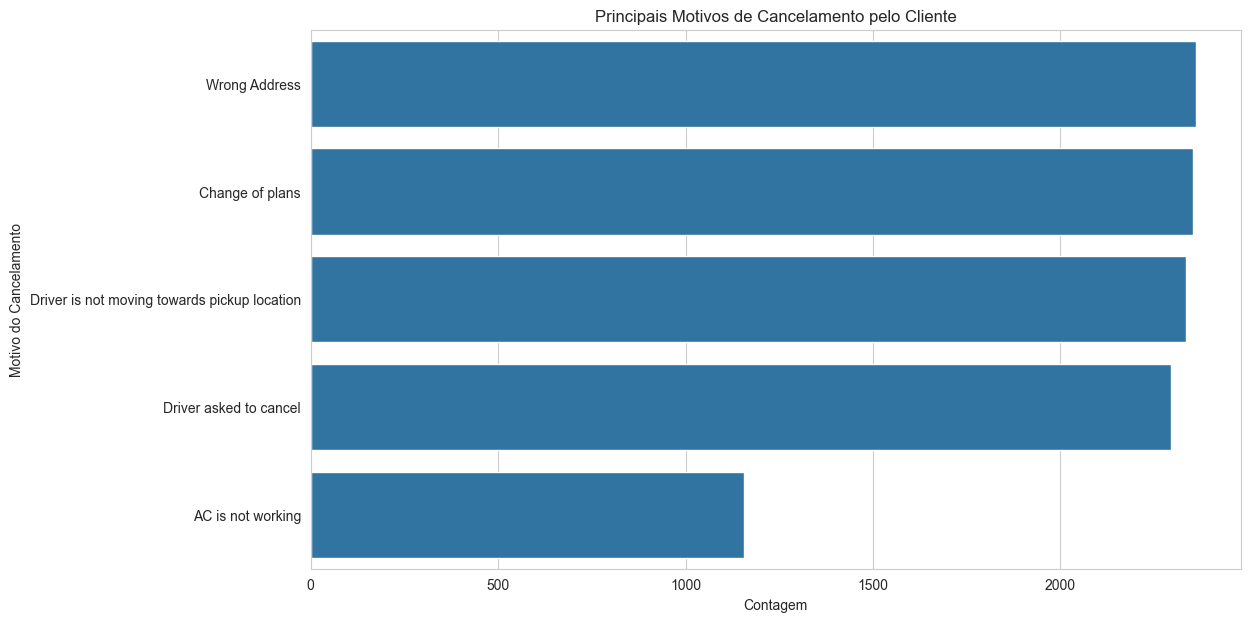

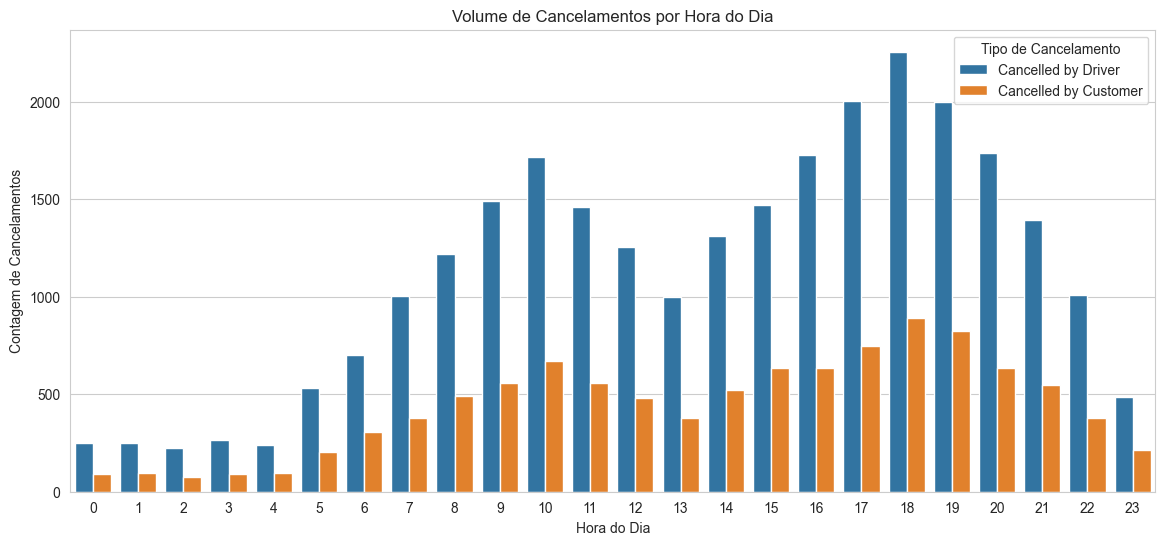

In [18]:
# Filtrar apenas as corridas canceladas
df_cancelled = df[df['Booking Status'].str.contains('Cancelled')]

# 1. Motivos de Cancelamento pelo Cliente
plt.figure(figsize=(12, 7))
sns.countplot(y='Reason for cancelling by Customer', data=df_cancelled, order=df_cancelled['Reason for cancelling by Customer'].value_counts().index)
plt.title('Principais Motivos de Cancelamento pelo Cliente')
plt.xlabel('Contagem')
plt.ylabel('Motivo do Cancelamento')
plt.show()

# 2. Cancelamentos ao longo das horas do dia
plt.figure(figsize=(14, 6))
sns.countplot(x='Hour', data=df_cancelled, hue='Booking Status')
plt.title('Volume de Cancelamentos por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Contagem de Cancelamentos')
plt.legend(title='Tipo de Cancelamento')
plt.show()

# INSIGHT PRELIMINAR: O gráfico acima nos ajuda a ver se os cancelamentos (tanto por motorista quanto por cliente)
# ocorrem mais em horários de pico.

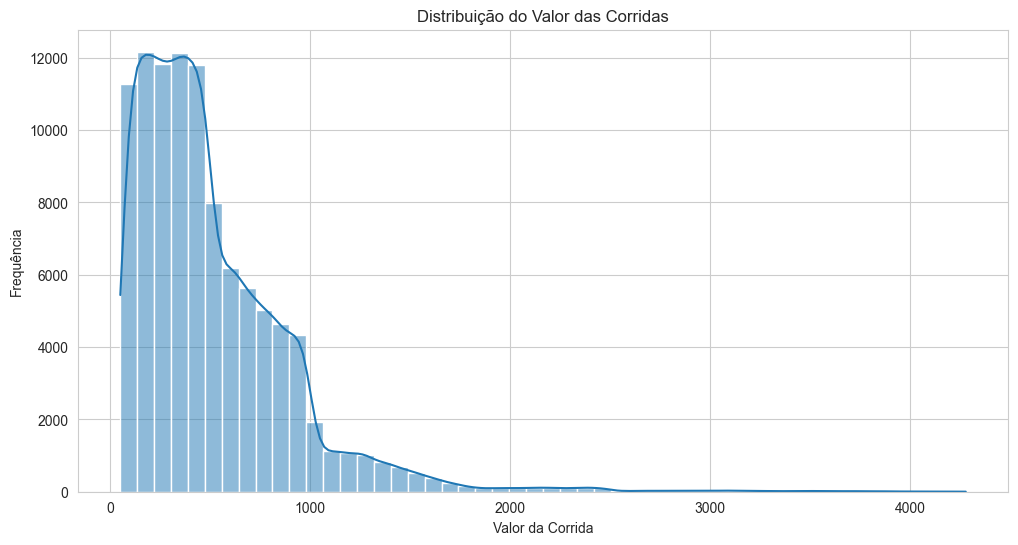

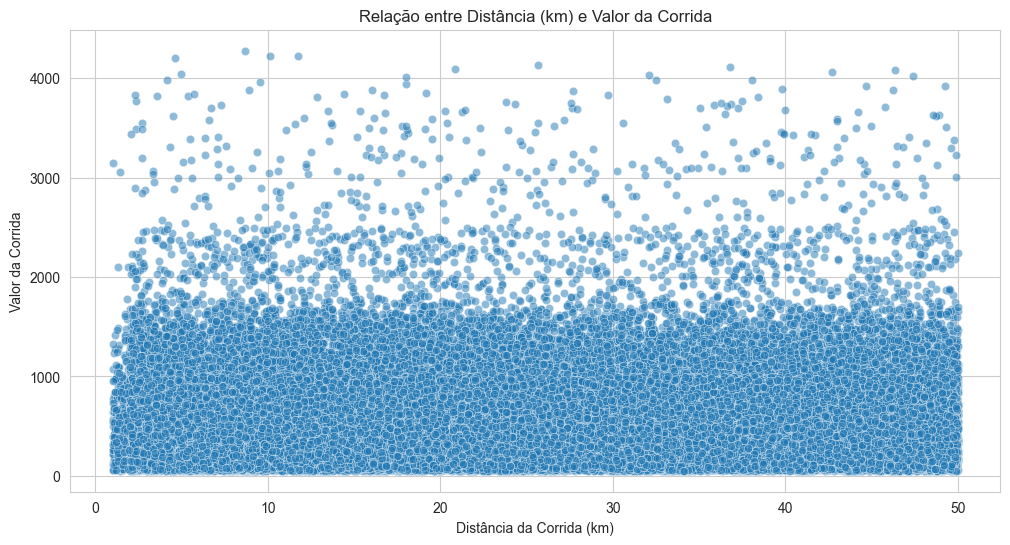

In [19]:
# 1. Distribuição do Valor da Corrida (Booking Value)
plt.figure(figsize=(12, 6))
sns.histplot(df['Booking Value'], bins=50, kde=True)
plt.title('Distribuição do Valor das Corridas')
plt.xlabel('Valor da Corrida')
plt.ylabel('Frequência')
plt.show()

# 2. Relação entre Distância da Corrida e Valor da Corrida
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Ride Distance', y='Booking Value', data=df, alpha=0.5)
plt.title('Relação entre Distância (km) e Valor da Corrida')
plt.xlabel('Distância da Corrida (km)')
plt.ylabel('Valor da Corrida')
plt.show()

# INSIGHT PRELIMINAR: Como esperado, existe uma correlação positiva clara entre a distância e o valor da corrida.

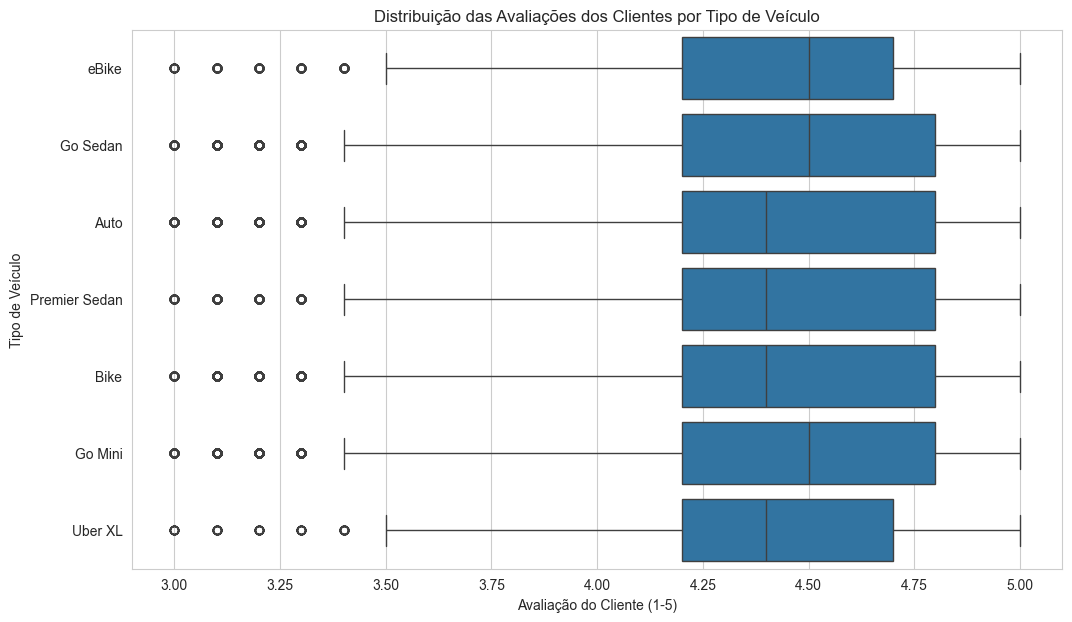

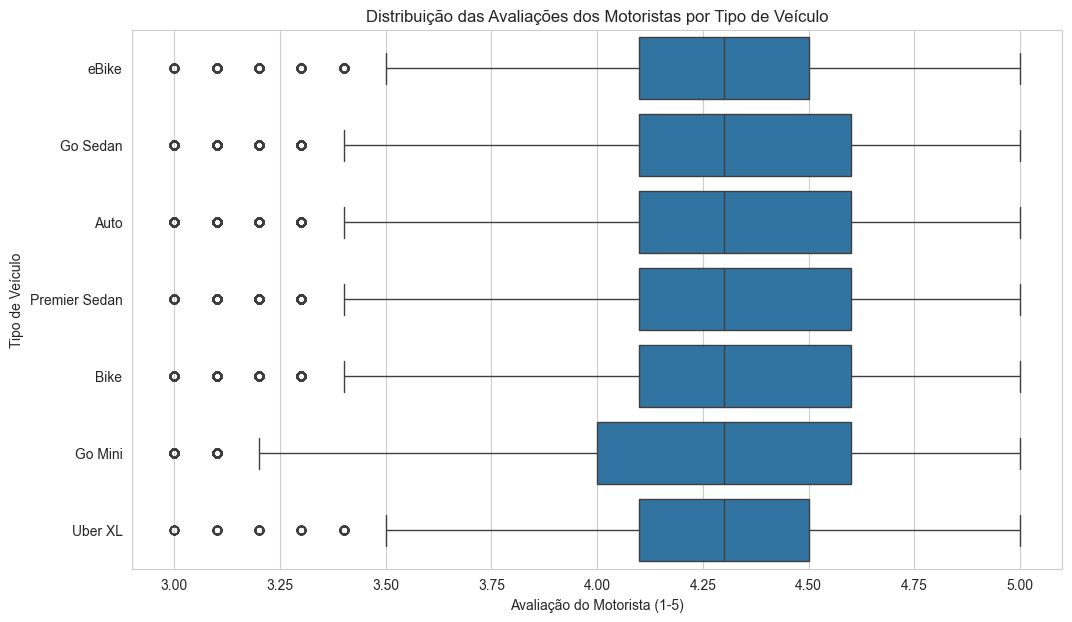

In [20]:
# Boxplot das avaliações dos clientes por tipo de veículo
plt.figure(figsize=(12, 7))
sns.boxplot(x='Customer Rating', y='Vehicle Type', data=df)
plt.title('Distribuição das Avaliações dos Clientes por Tipo de Veículo')
plt.xlabel('Avaliação do Cliente (1-5)')
plt.ylabel('Tipo de Veículo')
plt.show()

# Boxplot das avaliações dos motoristas por tipo de veículo
plt.figure(figsize=(12, 7))
sns.boxplot(x='Driver Ratings', y='Vehicle Type', data=df)
plt.title('Distribuição das Avaliações dos Motoristas por Tipo de Veículo')
plt.xlabel('Avaliação do Motorista (1-5)')
plt.ylabel('Tipo de Veículo')
plt.show()

# INSIGHT PRELIMINAR: Os boxplots mostram que as avaliações são muito consistentes entre os diferentes tipos de veículos,
# tanto para clientes quanto para motoristas, confirmando as informações do resumo do dataset.

### Resumo da Análise Exploratória

**Principais Insights:**
1.  **Padrões de Cancelamento:** Os cancelamentos estão concentrados em motivos específicos e parecem ter picos em determinados horários do dia, provavelmente coincidindo com os horários de pico de trânsito/trabalho.
2.  **Consistência dos Dados:** O dataset é robusto, com poucos dados faltantes, e as variáveis numéricas como `Booking Value` e `Ride Distance` mostram uma relação lógica e esperada.
3.  **Avaliações:** As avaliações são notavelmente estáveis e altas em todas as categorias de veículos, sugerindo uma qualidade de serviço consistente.
4.  **Variáveis Importantes:** `Hour`, `DayOfWeek`, `Vehicle Type` e `Avg VTAT` (não explorado visualmente aqui, mas crucial) parecem ser candidatos fortes para features no nosso modelo preditivo.